<a href="https://colab.research.google.com/github/0-0Jay/0-0Jay/blob/main/%EC%9E%8E%20%EB%B6%84%EB%A5%98%20%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고 자료<br>
1. 데이터 라벨링 : https://data-panic.tistory.com/13 <br>
2. 이미지 전처리 : https://luvris2.tistory.com/173 <br>

<h1>데이터 전처리</h1>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# 사전에 모든 이미지를 흑백으로 변경하여 학습

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import os
from keras.preprocessing import image

In [36]:
# 데이터 경로 설정
data_dir = '/content/drive/MyDrive/leaf'

# 이미지 데이터 생성기 설정
image_generator = image.ImageDataGenerator(
    rescale=1./255,  # 이미지 값을 0과 1 사이로 정규화
    validation_split=0.2   # 검증용 데이터셋의 비율
)

# 훈련 데이터 생성
train_set = image_generator.flow_from_directory(
    data_dir,
    target_size = (80, 120),  # 이미지 크기 조정
    batch_size = 32,
    class_mode = 'categorical',  # 다중 클래스 분류
    subset = 'training',  # 훈련용 데이터
    color_mode = 'grayscale',
    shuffle = True
)


# 검증 데이터 생성
validation_set = image_generator.flow_from_directory(
    data_dir,
    target_size = (80, 120),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation',  # 검증용 데이터
    color_mode = 'grayscale',
    shuffle = True
)



Found 586 images belonging to 5 classes.
Found 144 images belonging to 5 classes.


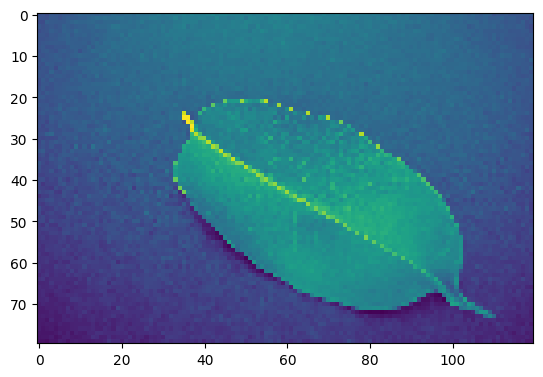

In [27]:
plt.imshow(train_set[0][0][20])

<h1>이미지 훈련 모델 생성</h1>

In [37]:
train_set.samples /32  # 1에폭당 몇개의 배치 사이즈가 들어가는지 체크

18.3125

In [40]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(80, 120, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 78, 118, 32)       320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 39, 59, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 37, 57, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 18, 28, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 26, 64)        36928     
                                                                 
 flatten_4 (Flatten)         (None, 26624)            

In [41]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
model.fit(train_set,
          steps_per_epoch = 16,   # 훈련세트 수 / 배치 사이즈
          epochs = 7,
          validation_data = validation_set,
          validation_steps = 16)

Epoch 1/7
16/16 [==============================] - ETA: 0s - loss: 1.3223 - accuracy: 0.4735 

16/16 [==============================] - 417s 26s/step - loss: 1.3223 - accuracy: 0.4735 - val_loss: 0.7049 - val_accuracy: 0.7431
Epoch 2/7
16/16 [==============================] - 77s 5s/step - loss: 0.5443 - accuracy: 0.8020
Epoch 3/7
16/16 [==============================] - 75s 5s/step - loss: 0.3563 - accuracy: 0.8673
Epoch 4/7
16/16 [==============================] - 87s 6s/step - loss: 0.3923 - accuracy: 0.8510
Epoch 5/7
16/16 [==============================] - 78s 5s/step - loss: 0.3023 - accuracy: 0.8918
Epoch 6/7
16/16 [==============================] - 75s 5s/step - loss: 0.2087 - accuracy: 0.9395
Epoch 7/7
16/16 [==============================] - 79s 5s/step - loss: 0.1157 - accuracy: 0.9571


<h1>모델 평가</h1>

In [42]:
model.evaluate(validation_set)

5/5 [==============================] - 22s 4s/step - loss: 0.2317 - accuracy: 0.9167


[0.23174503445625305, 0.9166666865348816]

<h1>실제 동작 테스트</h1>

In [43]:
from google.colab import files
import cv2
# 사진 업로드 하기
uploaded = files.upload()

In [44]:
target_list = ["Basil", "Chinar", "Jamun", "Lemon", "Mango"]

1/1 [==============================] - 0s 235ms/step
Jamun
확률값
Basil : 0.0000087
Chinar : 0.0001378
Jamun : 0.9995091
Lemon : 0.0002104
Mango : 0.0001340


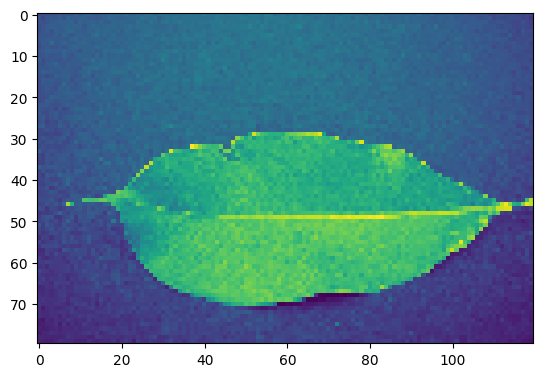

In [45]:
# 클래스 별 이미지 비율 조정을 위해 제거했던 jamun 사진으로 테스트
img = image.load_img("jamun.JPG", target_size=(80, 120), grayscale=True)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis = 0)
img_array = img_array / 255.0

predict = model.predict(img_array)
plt.imshow(img)
print(target_list[np.argmax(predict)])


print("확률값")
for i in range(5):
  print(target_list[i], ':', "%0.7f" % predict[0][i])

1/1 [==============================] - 0s 26ms/step
Mango
확률값
Basil : 0.0000048
Chinar : 0.0000002
Jamun : 0.0000020
Lemon : 0.0010746
Mango : 0.9989184


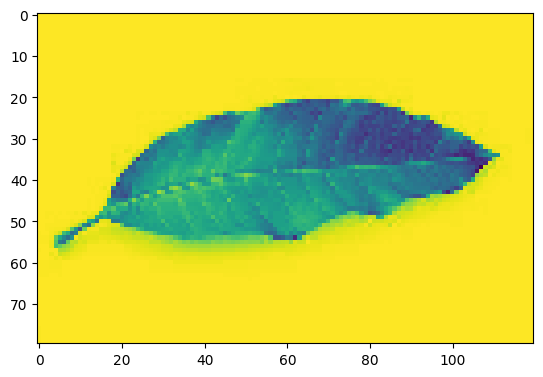

In [52]:
# 웹에서 찾은 망고 사진으로 테스트
img = image.load_img("mango.jpg", target_size=(80, 120), grayscale=True)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis = 0)
img_array = (255 - img_array) / 255.0  # 배경이 하얀 사진이므로 반전

predict = model.predict(img_array)  # 결과 예측
plt.imshow(img)
print(target_list[np.argmax(predict)])

print("확률값")
for i in range(5):
  print(target_list[i], ':', "%0.7f" % predict[0][i])

1/1 [==============================] - 0s 40ms/step
Chinar
확률값
Basil : 0.0010502
Chinar : 0.9989498
Jamun : 0.0000000
Lemon : 0.0000000
Mango : 0.0000000


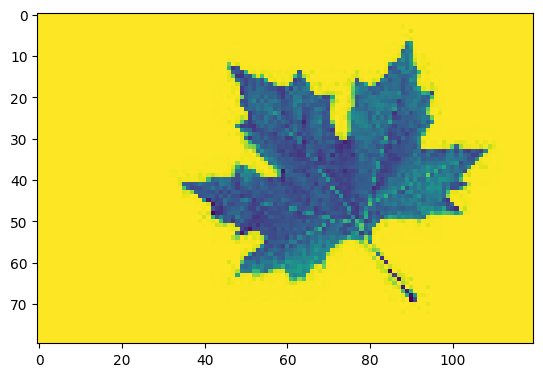

In [51]:
# 웹에서 찾은 버즘나무잎 사진으로 테스트
img = image.load_img("chinar.jpg", target_size=(80, 120), grayscale=True)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis = 0)
img_array = (255 - img_array) / 255.0  # 배경이 하얀 사진이므로 반전

predict = model.predict(img_array)  # 결과 예측
plt.imshow(img)
print(target_list[np.argmax(predict)])

print("확률값")
for i in range(5):
  print(target_list[i], ':', "%0.7f" % predict[0][i])